# Data

## Data Collection
Data was collected from Laevitas [getHistoricalOptionsSnapshot](https://api.laevitas.ch/swagger#/Historical%20Options/getHistoricalOptionsSnapshot) from 2024-10-01 00:00:00 (UTC) to 2025-02-28 23:59:59(UTC) in minute interval, saved in monthly files.

Each object in the items array represents a historical snapshot of a specific options contract and includes:
- date: The date of the snapshot.
- strike: The strike price of the option.
- expiration_date: The expiration date of the option.
- claim_type: The type of the option (call or put).
- open_interest: The total open interest of the option.
- volume: The trading volume of the option.
- underlyer: The underlying asset of the option.
- underlyer_spot: The spot price of the underlying asset at the time of the snapshot.
- forward_price: The forward price of the option.
- mark_price: The market price of the option.
- mark_iv: The market implied volatility of the option.
- bid_iv: The bid implied volatility of the option.
- best_bid_price: The best bid price for the option.
- best_bid_amount: The best bid amount for the option.
- best_ask_price: The best ask price for the option.
- best_ask_amount: The best ask amount for the option.
- ask_iv: The ask implied volatility of the option.
- exercise: The exercise style of the option (American, European).
- settlement: The settlement type of the option (cash, physical).
- instrument_name: The name of the instrument (option contract).

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/ryant/Documents/Github/digital-asset-options-pricing/src/data/deribit/data/deribit_btc_snapshot.csv')
df

,date,open_interest,underlyer,expiration_date,claim_type,mark_price,mark_iv,bid_iv,ask_iv,exercise,settlement,strike,best_bid_price,best_ask_price,underlyer_spot,forward_price,volume,best_ask_amount,best_bid_amount,instrument_name
0,1727740800000,3.5,BTC_USD,2024-10-04T08:00:00.000Z,put,0.3252,69.57,0.00,154.72,European,cash,84000,0.3220,0.3270,63357.25,63389.3900,0.0,70.0,70.0,BTC-4OCT24-84000-P
1,1727740800000,101.4,BTC_USD,2024-10-04T08:00:00.000Z,call,0.0000,69.57,0.00,104.90,European,cash,84000,0.0000,0.0001,63357.25,63389.3900,0.0,2.0,0.0,BTC-4OCT24-84000-C
2,1727740800000,0.8,BTC_USD,2024-10-04T08:00:00.000Z,put,0.2936,69.56,0.00,144.61,European,cash,82000,0.2905,0.2955,63357.25,63389.3900,0.0,70.0,70.0,BTC-4OCT24-82000-P
3,1727740800000,64.0,BTC_USD,2024-10-04T08:00:00.000Z,call,0.0000,69.56,0.00,96.89,European,cash,82000,0.0000,0.0001,63357.25,63389.3900,0.0,0.3,0.0,BTC-4OCT24-82000-C
4,1727740800000,0.2,BTC_USD,2024-10-04T08:00:00.000Z,put,0.2621,69.56,0.00,139.68,European,cash,80000,0.2590,0.2645,63357.25,63389.3900,0.0,77.5,81.2,BTC-4OCT24-80000-P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745745,1740355200000,167.0,BTC_USD,2025-12-26T08:00:00.000Z,call,0.2222,57.96,57.16,58.75,European,cash,100000,0.2195,0.2250,96286.28,103353.3600,0.0,18.4,22.7,BTC-26DEC25-100000-C
2745746,1740355200000,0.0,BTC_USD,2025-04-25T08:00:00.000Z,put,1.0529,71.80,0.00,0.00,European,cash,200000,0.0000,0.0000,96285.98,97466.4785,0.0,0.0,0.0,BTC-25APR25-200000-P
2745747,1740355200000,187.7,BTC_USD,2025-04-25T08:00:00.000Z,call,0.0009,71.80,70.54,73.22,European,cash,200000,0.0008,0.0011,96285.98,97466.4785,11.7,29.9,53.4,BTC-25APR25-200000-C
2745748,1740355200000,0.0,BTC_USD,2025-04-25T08:00:00.000Z,put,0.8484,67.33,0.00,0.00,European,cash,180000,0.0000,0.0000,96285.98,97466.4785,0.0,0.0,0.0,BTC-25APR25-180000-P


In [4]:
df['datetime'] = pd.to_datetime(df['date'], unit='ms')
df['datetime'].describe()

count                          2745750
mean     2024-12-12 11:02:33.534445312
min                2024-10-01 00:00:00
25%                2024-11-07 00:00:00
50%                2024-12-13 02:00:00
75%                2025-01-17 09:00:00
max                2025-02-24 00:00:00
Name: datetime, dtype: object

# Information from one instrument

In [33]:
df[df['instrument_name'] == "BTC-28FEB25-100000-C"] 

,date,open_interest,underlyer,expiration_date,claim_type,mark_price,mark_iv,bid_iv,ask_iv,exercise,...,strike,best_bid_price,best_ask_price,underlyer_spot,forward_price,volume,best_ask_amount,best_bid_amount,instrument_name,datetime
1125071,1732784400000,0.0,BTC_USD,2025-02-28T08:00:00.000Z,call,0.1144,59.78,59.07,60.58,European,...,100000,0.1130,0.1160,95507.85,98892.0646,0.0,14.1,18.5,BTC-28FEB25-100000-C,2024-11-28 09:00:00
1126021,1732788000000,0.0,BTC_USD,2025-02-28T08:00:00.000Z,call,0.1119,59.84,59.12,60.38,European,...,100000,0.1105,0.1130,94971.04,98299.8631,0.0,11.2,26.4,BTC-28FEB25-100000-C,2024-11-28 10:00:00
1126971,1732791600000,0.0,BTC_USD,2025-02-28T08:00:00.000Z,call,0.1114,59.60,59.15,60.15,European,...,100000,0.1105,0.1125,94978.29,98294.1100,0.0,8.5,22.8,BTC-28FEB25-100000-C,2024-11-28 11:00:00
1127921,1732795200000,0.0,BTC_USD,2025-02-28T08:00:00.000Z,call,0.1131,59.46,58.92,59.68,European,...,100000,0.1120,0.1135,95424.50,98749.5923,0.0,6.8,22.8,BTC-28FEB25-100000-C,2024-11-28 12:00:00
1128871,1732798800000,0.0,BTC_USD,2025-02-28T08:00:00.000Z,call,0.1125,59.00,58.51,59.26,European,...,100000,0.1115,0.1130,95485.44,98829.4315,0.0,6.8,22.8,BTC-28FEB25-100000-C,2024-11-28 13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742293,1740340800000,1839.5,BTC_USD,2025-02-28T08:00:00.000Z,call,0.0054,44.50,43.17,46.37,European,...,100000,0.0050,0.0060,95740.44,95820.4400,38.6,76.0,27.6,BTC-28FEB25-100000-C,2025-02-23 20:00:00
2743007,1740344400000,1845.7,BTC_USD,2025-02-28T08:00:00.000Z,call,0.0055,44.69,43.16,44.78,European,...,100000,0.0050,0.0055,95785.24,95852.7200,47.6,1.1,30.1,BTC-28FEB25-100000-C,2025-02-23 21:00:00
2743721,1740348000000,1845.8,BTC_USD,2025-02-28T08:00:00.000Z,call,0.0053,44.59,43.44,45.08,European,...,100000,0.0050,0.0055,95759.85,95840.6300,47.7,0.1,27.0,BTC-28FEB25-100000-C,2025-02-23 22:00:00
2744435,1740351600000,1845.8,BTC_USD,2025-02-28T08:00:00.000Z,call,0.0061,45.91,43.97,47.09,European,...,100000,0.0055,0.0065,95955.43,96038.0000,46.8,56.0,34.3,BTC-28FEB25-100000-C,2025-02-23 23:00:00


Plotting data for instrument: BTC-28FEB25-100000-C


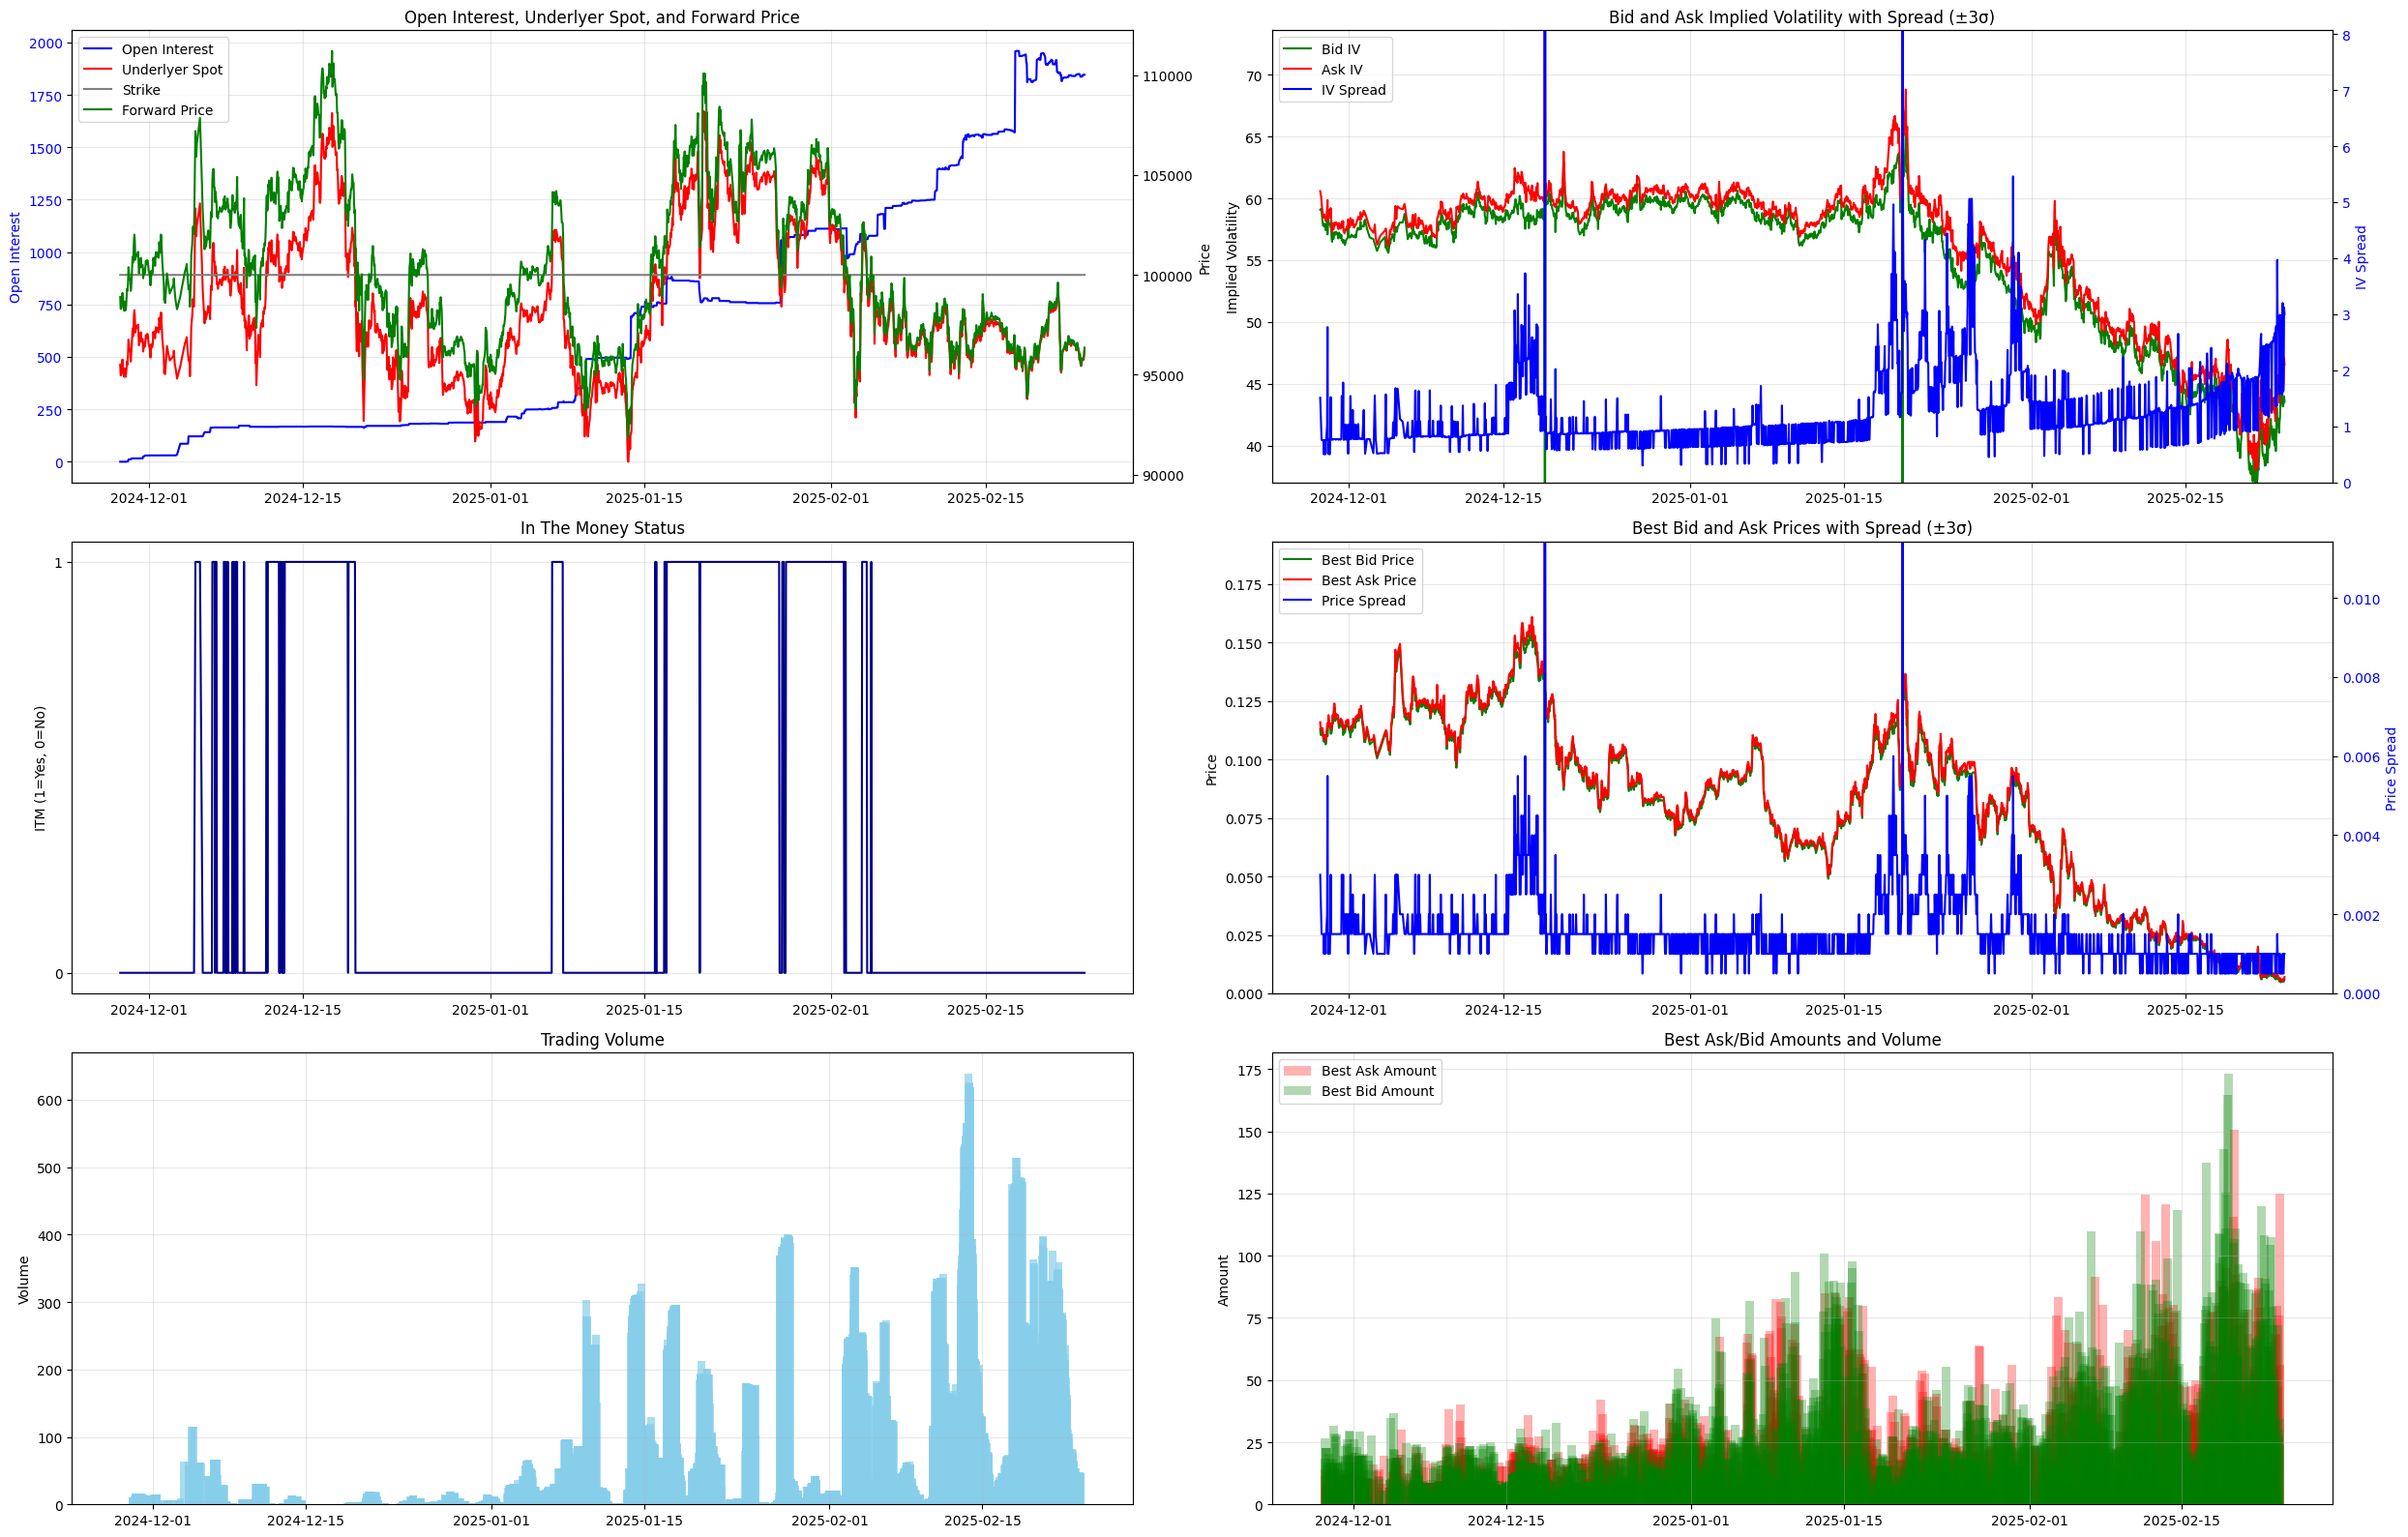

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

def plot_options_data(df, instrument_name=None, num_std = 3):
    """
    Plot comprehensive options data visualization with multiple subplots.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing options data with the following columns:
        'datetime', 'open_interest', 'underlyer_spot', 'forward_price',
        'bid_iv', 'ask_iv', 'best_bid_price', 'best_ask_price', 
        'volume', 'claim_type', 'strike', 'best_ask_amount', 'best_bid_amount',
        'instrument_name'
    instrument_name : str, optional
        If provided, filter the dataframe to only include data for this specific instrument.
        If None, all data will be used.
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        Figure containing all subplots
    """
    
    # Filter for specific instrument if provided
    if instrument_name is not None:
        if instrument_name not in df['instrument_name'].unique():
            raise ValueError(f"Instrument '{instrument_name}' not found in the dataframe")
        df = df[df['instrument_name'] == instrument_name].copy()
        print(f"Plotting data for instrument: {instrument_name}")
    else:
        print("Plotting data for all instruments combined")
        
    # Check if we have data after filtering
    if len(df) == 0:
        raise ValueError("No data available after filtering")
        
    # Convert datetime to proper format if it's not already
    if not pd.api.types.is_datetime64_dtype(df['datetime']):
        df['datetime'] = pd.to_datetime(df['datetime'])
    
    # Sort data by datetime
    df = df.sort_values('datetime')
    
    # Calculate spreads
    df['iv_spread'] = df['ask_iv'] - df['bid_iv']
    df['price_spread'] = df['best_ask_price'] - df['best_bid_price']
    
    # Calculate ITM (In The Money) indicator
    df['ITM'] = np.where(
        ((df['claim_type'] == 'call') & (df['underlyer_spot'] > df['strike'])) |
        ((df['claim_type'] == 'put') & (df['underlyer_spot'] < df['strike'])),
        1, 0
    )
    
    # Create figure with GridSpec
    fig = plt.figure(figsize=(25, 16))
    gs = GridSpec(3, 2, figure=fig)
    
    # Create all subplots
    ax1 = fig.add_subplot(gs[0, 0])  # Open Interest + underlyer_spot + forward_price
    ax1_twin = ax1.twinx()  # For right y-axis
    
    ax2 = fig.add_subplot(gs[0, 1])  # bid_iv and ask_iv
    ax2_twin = ax2.twinx()  # For IV spread
    
    ax3 = fig.add_subplot(gs[1, 0])  # ITM
    
    ax4 = fig.add_subplot(gs[1, 1])  # best_bid_price and best_ask_price
    ax4_twin = ax4.twinx()  # For price spread
    
    ax5 = fig.add_subplot(gs[2, 0])  # volume
    
    ax6 = fig.add_subplot(gs[2, 1])  # best_ask_amount, best_bid_amount, volume scatter
    
    # 1. Plot Open Interest (left axis), underlyer_spot and forward_price (right axis)
    ax1.plot(df['datetime'], df['open_interest'], color='blue', label='Open Interest')
    ax1.set_ylabel('Open Interest', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    ax1_twin.plot(df['datetime'], df['underlyer_spot'], color='red', label='Underlyer Spot')
    ax1_twin.plot(df['datetime'], df['strike'], color='grey', label='Strike')
    ax1_twin.plot(df['datetime'], df['forward_price'], color='green', label='Forward Price')
    ax1_twin.set_ylabel('Price', color='black')
    
    # Combine legends from both y-axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax1_twin.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    ax1.set_title('Open Interest, Underlyer Spot, and Forward Price')
    
    # 2. Plot bid_iv and ask_iv (left axis), iv_spread (right axis)
    # Calculate statistics for IV data to handle outliers
    bid_iv_mean, bid_iv_std = df['bid_iv'].mean(), df['bid_iv'].std()
    ask_iv_mean, ask_iv_std = df['ask_iv'].mean(), df['ask_iv'].std()
    iv_spread_mean, iv_spread_std = df['iv_spread'].mean(), df['iv_spread'].std()
    
    
    # Set y-limits to mean ± 2*std for both axes
    iv_min = max(0, min(bid_iv_mean - num_std*bid_iv_std, ask_iv_mean - num_std*ask_iv_std))
    iv_max = max(bid_iv_mean + num_std*bid_iv_std, ask_iv_mean + num_std*ask_iv_std)
    spread_min = max(0, iv_spread_mean - num_std*iv_spread_std)
    spread_max = iv_spread_mean + num_std*iv_spread_std
    
    ax2.plot(df['datetime'], df['bid_iv'], color='green', label='Bid IV')
    ax2.plot(df['datetime'], df['ask_iv'], color='red', label='Ask IV')
    ax2.set_ylabel('Implied Volatility', color='black')
    ax2.set_ylim(iv_min, iv_max)
    
    # Add IV spread on right axis
    ax2_twin.plot(df['datetime'], df['iv_spread'], color='blue', linestyle='-', label='IV Spread')
    ax2_twin.set_ylabel('IV Spread', color='blue')
    ax2_twin.tick_params(axis='y', labelcolor='blue')
    ax2_twin.set_ylim(spread_min, spread_max)
    
    # Combine legends
    lines1, labels1 = ax2.get_legend_handles_labels()
    lines2, labels2 = ax2_twin.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    ax2.set_title(f'Bid and Ask Implied Volatility with Spread (±{num_std}σ)')

    # 3. Plot ITM indicator
    ax3.plot(df['datetime'], df['ITM'], linestyle='-', color='darkblue')
    ax3.set_ylabel('ITM (1=Yes, 0=No)')
    ax3.set_yticks([0, 1])
    ax3.set_title('In The Money Status')

    # 4. Plot best_bid_price and best_ask_price (left axis), price_spread (right axis)
    # Calculate statistics for price data to handle outliers
    bid_price_mean, bid_price_std = df['best_bid_price'].mean(), df['best_bid_price'].std()
    ask_price_mean, ask_price_std = df['best_ask_price'].mean(), df['best_ask_price'].std()
    price_spread_mean, price_spread_std = df['price_spread'].mean(), df['price_spread'].std()
    
    # Set y-limits to mean ± 2*std for both axes
    price_min = max(0, min(bid_price_mean - num_std*bid_price_std, ask_price_mean - num_std*ask_price_std))
    price_max = max(bid_price_mean + num_std*bid_price_std, ask_price_mean + num_std*ask_price_std)
    price_spread_min = max(0, price_spread_mean - num_std*price_spread_std)
    price_spread_max = price_spread_mean + num_std*price_spread_std
    
    ax4.plot(df['datetime'], df['best_bid_price'], color='green', label='Best Bid Price')
    ax4.plot(df['datetime'], df['best_ask_price'], color='red', label='Best Ask Price')
    ax4.set_ylabel('Price', color='black')
    ax4.set_ylim(price_min, price_max)
    
    # Add price spread on right axis
    ax4_twin.plot(df['datetime'], df['price_spread'], color='blue', linestyle='-', label='Price Spread')
    ax4_twin.set_ylabel('Price Spread', color='blue')
    ax4_twin.tick_params(axis='y', labelcolor='blue')
    ax4_twin.set_ylim(price_spread_min, price_spread_max)
    
    # Combine legends
    lines1, labels1 = ax4.get_legend_handles_labels()
    lines2, labels2 = ax4_twin.get_legend_handles_labels()
    ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    ax4.set_title(f'Best Bid and Ask Prices with Spread (±{num_std}σ)')
    
    # 5. Plot volume
    ax5.bar(df['datetime'], df['volume'], color='skyblue', alpha=0.7, width=0.7)
    ax5.set_ylabel('Volume')
    ax5.set_title('Trading Volume')
    
    # 6. Scatter plot of best_ask_amount, best_bid_amount, and volume
    ax6.bar(df['datetime'], df['best_ask_amount'], 
                     color='red', alpha=0.3,label='Best Ask Amount')
    ax6.bar(df['datetime'], df['best_bid_amount'], 
                     color='green', alpha=0.3, label='Best Bid Amount')
    # sc1 = ax6.scatter(df['datetime'], df['best_ask_amount'], 
    #                  c='red', alpha=0.6, label='Best Ask Amount')
    # sc2 = ax6.scatter(df['datetime'], df['best_bid_amount'], 
    #                  c='green', alpha=0.6, label='Best Bid Amount')

    ax6.set_ylabel('Amount')
    ax6.legend()
    ax6.set_title('Best Ask/Bid Amounts and Volume')
    
    # Format x-axis dates for all subplots
    for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
        ax.grid(True, alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()
    
    plt.show()

plot_options_data(df, instrument_name="BTC-28FEB25-100000-C")